# MNIST dataset using CNN and ANN

In [85]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [42]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
X_test.shape

(10000, 28, 28)

In [45]:
y_train.shape

(60000,)

In [46]:
y_test.shape

(10000,)

In [60]:
y_train=y_train.reshape(-1,)
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

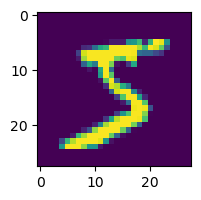

In [61]:
def sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
sample(X_train,y_train,0)

In [62]:
X_train=X_train/255
X_test=X_test/255

In [76]:
cnn=models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(10, activation='softmax')
    
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2640 - accuracy: 0.5532
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5317 - accuracy: 0.8332
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3946 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3196 - accuracy: 0.9025
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.9152


In [77]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.95      0.95      1028
           8       0.96      0.94      0.95       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [78]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9621


[0.11666356027126312, 0.9621000289916992]

In [82]:
ann=models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(10, activation='softmax')
])
ann.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 902us/step - loss: 1.2209 - accuracy: 0.5844
Epoch 2/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.6843 - accuracy: 0.7878
Epoch 3/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.5531 - accuracy: 0.8376
Epoch 4/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.4844 - accuracy: 0.8600
Epoch 5/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.4386 - accuracy: 0.8748


In [83]:
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 0s 558us/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.95      0.89      0.92      1032
           3       0.93      0.90      0.92      1010
           4       0.89      0.95      0.92       982
           5       0.87      0.88      0.88       892
           6       0.92      0.96      0.94       958
           7       0.96      0.89      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [84]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 0s 612us/step - loss: 0.2697 - accuracy: 0.9201


[0.26970434188842773, 0.9200999736785889]